### Box Muller

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 10000
s = np.random.uniform(size=N)
t = np.random.uniform(size=N)

In [3]:
def normal(mu, sigma):
    x = mu + sigma * np.sqrt(-2 * np.log(s)) * np.cos(2 * np.pi * t)
    y = mu + sigma * np.sqrt(-2 * np.log(s)) * np.sin(2 * np.pi * t)
    return x, y

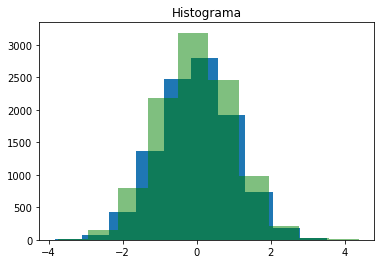

In [4]:
x, y = normal(0, 1)
plt.title('Histograma')
plt.hist(x)
plt.hist(y, alpha=0.5, color='green')
plt.show()

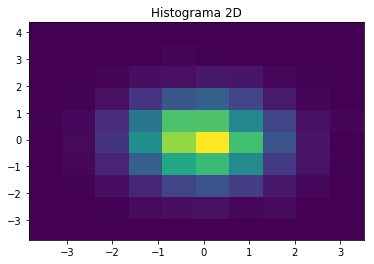

In [5]:
plt.hist2d(x, y)
plt.title('Histograma 2D')
plt.show()

### Importance Sampling

In [19]:
from scipy.stats import norm, laplace, cauchy

In [20]:
N = 10000

In [21]:
phi = lambda z: np.sqrt(4 - z)
p = lambda z: 1 / (z ** 2)

In [22]:
def estimate_integral(phi, p, distribution):
    samples = distribution.rvs(size=N)
    samples = samples[samples < 4]
    samples = samples[samples > 1]
    return (1 / N) * np.sum(phi(samples) * p(samples) / distribution.pdf(samples))

In [23]:
QG = norm(1.7, 0.5)
QL = laplace(0.8, 0.5)
QC = cauchy(1, 0.8)

Realizo el experimento 10 veces para evitar el ruido de la aleatoriedad, pero mantengo el $N$ bajo, de modo que las aproximaciones realmente varían según lo buena o mala que sea la utilización de $QX$ como la distribución a utilizar.

In [24]:
with_normal = np.average([estimate_integral(phi, p, QG) for _ in range(10)])
with_laplace = np.average([estimate_integral(phi, p, QL) for _ in range(10)])
with_cauchy = np.average([estimate_integral(phi, p, QC) for _ in range(10)])
with_normal, with_laplace, with_cauchy

(1.078725046856776, 1.0722160000214054, 1.0699345444804857)

Como se aprecia, si bien ninguna de las aproximaciones es demasiado buena respecto al valor teórico, se acercan bastante, pero en ciertos casos, como la Cauchy, suele estar más lejos lo que nos indica que quizás no es una buena idea utilizarla, como se apreciará mejor en el gráfico.

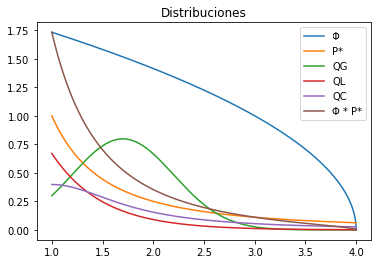

In [25]:
x = np.linspace(1, 4, 1000)
plt.plot(x, phi(x))
plt.plot(x, p(x))
plt.plot(x, QG.pdf(x))
plt.plot(x, QL.pdf(x))
plt.plot(x, QC.pdf(x))
plt.plot(x, phi(x) * p(x))
plt.legend(['Φ', 'P*', 'QG', 'QL', 'QC', 'Φ * P*'])
plt.title('Distribuciones')
plt.show()

En el gráfico se observa que para valores pequeños (cercanos a 1), se da que por ejemplo Cauchy, no es tan grande como $\Phi * P^*$ (que se incluye también para mejor entendimiento), por lo que la correspondencia no es tan buena, por otro lado, se ve que la normal tampoco calza mucho. Por otro lado Laplace parece calzar bastante en la forma, pero no tanto en los valores.

De este modo se puede concluir que es muy complejo elegir un $QX$ que sea bueno para hacer la estimación, sin embargo, se puede mitigar eso generando muestras muy grandes.